In [315]:
####################################################################
# A program that attempts to assign different soccer players their positions based on 
# an unsupervised K-means clustering algorithm
# There will be four cluster: GK, DF, MD, FW
# Data includes features from passing, shooting and defensiving metrics
# Data found online at fbref.com
#

In [316]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [317]:
# Import the passing data set
df_pass = pd.read_csv('EPL_data/EPL_Passing.txt')

In [318]:
df_pass.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,...,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,27.9,1227.0,1558.0,...,58.5,2,3.1,-1.1,32.0,85.0,25.0,5.0,216.0,Matches
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,36.0,1316.0,1684.0,...,54.6,1,3.4,-2.4,24.0,44.0,32.0,13.0,123.0,Matches
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,24.6,288.0,413.0,...,73.6,3,2.6,0.4,18.0,16.0,5.0,0.0,32.0,Matches
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,12.3,184.0,265.0,...,55.8,2,1.3,0.7,11.0,12.0,3.0,0.0,21.0,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,9.7,227.0,314.0,...,58.4,0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,Matches


In [319]:
# Look at the features of the dataset
df_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 31 columns):
Rk         522 non-null int64
Player     522 non-null object
Nation     522 non-null object
Pos        522 non-null object
Squad      522 non-null object
Age        520 non-null float64
Born       520 non-null float64
90s        522 non-null float64
Cmp        521 non-null float64
Att        521 non-null float64
Cmp%       517 non-null float64
TotDist    521 non-null float64
PrgDist    521 non-null float64
Cmp.1      521 non-null float64
Att.1      521 non-null float64
Cmp%.1     478 non-null float64
Cmp.2      521 non-null float64
Att.2      521 non-null float64
Cmp%.2     516 non-null float64
Cmp.3      521 non-null float64
Att.3      521 non-null float64
Cmp%.3     507 non-null float64
Ast        522 non-null int64
xA         521 non-null float64
A-xA       521 non-null float64
KP         521 non-null float64
1/3        521 non-null float64
PPA        521 non-null float64
CrsPA  

In [320]:
# Load in defensive data
df_def = pd.read_csv('EPL_data/EPL_Defense.txt')

In [321]:
df_def.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,...,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,27.9,51.0,32,...,37.0,57.0,13.0,1.0,44.0,46,97,67.0,3.0,Matches
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,36.0,64.0,36,...,62.0,100.0,30.0,2.0,70.0,35,99,86.0,0.0,Matches
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,24.6,14.0,10,...,241.0,23.0,5.0,0.0,18.0,5,19,26.0,0.0,Matches
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,12.3,8.0,6,...,125.0,10.0,1.0,0.0,9.0,2,10,10.0,0.0,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,9.7,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,2.0,Matches


In [322]:
df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 32 columns):
Rk           522 non-null int64
Player       522 non-null object
Nation       522 non-null object
Pos          522 non-null object
Squad        522 non-null object
Age          520 non-null float64
Born         520 non-null float64
90s          522 non-null float64
Tkl          521 non-null float64
TklW         522 non-null int64
Def 3rd      521 non-null float64
Mid 3rd      521 non-null float64
Att 3rd      521 non-null float64
Tkl.1        521 non-null float64
Att          521 non-null float64
Tkl%         467 non-null float64
Past         521 non-null float64
Press        521 non-null float64
Succ         521 non-null float64
%            503 non-null float64
Def 3rd.1    521 non-null float64
Mid 3rd.1    521 non-null float64
Att 3rd.1    521 non-null float64
Blocks       521 non-null float64
Sh           521 non-null float64
ShSv         521 non-null float64
Pass         521 no

In [323]:
# Load in the shooting data
df_sh = pd.read_csv('EPL_data/EPL_Shooting.txt')

In [324]:
df_sh.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,G/SoT,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,27.9,3,26,...,0.40,3.0,1,1,2.3,1.5,0.06,0.7,0.5,Matches
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,36.0,0,14,...,0.00,0.0,0,0,0.5,0.5,0.03,-0.5,-0.5,Matches
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,24.6,15,88,...,0.43,0.0,0,0,14.5,14.5,0.17,0.5,0.5,Matches
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,12.3,4,37,...,0.44,0.0,0,0,4.2,4.2,0.11,-0.2,-0.2,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,9.7,0,0,...,NaN,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [325]:
df_sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 25 columns):
Rk         522 non-null int64
Player     522 non-null object
Nation     522 non-null object
Pos        522 non-null object
Squad      522 non-null object
Age        520 non-null float64
Born       520 non-null float64
90s        522 non-null float64
Gls        522 non-null int64
Sh         522 non-null int64
SoT        522 non-null int64
SoT%       439 non-null float64
Sh/90      522 non-null float64
SoT/90     522 non-null float64
G/Sh       439 non-null float64
G/SoT      367 non-null float64
FK         521 non-null float64
PK         522 non-null int64
PKatt      522 non-null int64
xG         521 non-null float64
npxG       521 non-null float64
npxG/Sh    439 non-null float64
G-xG       521 non-null float64
np:G-xG    521 non-null float64
Matches    522 non-null object
dtypes: float64(14), int64(6), object(5)
memory usage: 102.0+ KB


In [326]:
# Since the player names are sorted alphabetically, can use concat to merge all the data 
df = pd.concat([df_sh,df_pass,df_def], axis=1)

In [327]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches', 'Rk',
       'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Cmp', 'Att',
       'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2',
       'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xA', 'A-xA',
       'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'Matches', 'Rk', 'Player',
       'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Tkl', 'TklW',
       'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att', 'Tkl%', 'Past',
       'Press', 'Succ', '%', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Blocks',
       'Sh', 'ShSv', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Matches'],
      dtype='object')

In [328]:
# Drop the duplicate columns like 90s, which were in all three dataframes 
df=df.T.drop_duplicates().T

In [329]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches', 'Cmp',
       'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1',
       'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xA',
       'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'Tkl', 'TklW', 'Def 3rd',
       'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att', 'Tkl%', 'Past', 'Press', 'Succ',
       '%', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Blocks', 'Sh', 'ShSv',
       'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
      dtype='object')

In [330]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28,1990,27.9,3,26,...,71,37,57,13,1,44,46,97,67,3
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19,2000,36,0,14,...,142,62,100,30,2,70,35,99,86,0
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21,1997,24.6,15,88,...,169,241,23,5,0,18,5,19,26,0
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23,1996,12.3,4,37,...,97,125,10,1,0,9,2,10,10,0
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32,1987,9.7,0,0,...,0,0,0,0,0,0,0,0,0,2


In [331]:
# Look to find the NaN values.  There are a few since most goalies don't have a Goal or a Shots of Target
df.isnull().sum()

Rk             0
Player         0
Nation         0
Pos            0
Squad          0
Age            2
Born           2
90s            0
Gls            0
Sh             0
SoT            0
SoT%          83
Sh/90          0
SoT/90         0
G/Sh          83
G/SoT        155
FK             1
PK             0
PKatt          0
xG             1
npxG           1
npxG/Sh       83
G-xG           1
np:G-xG        1
Matches        0
Cmp            1
Att            1
Cmp%           5
TotDist        1
PrgDist        1
            ... 
xA             1
A-xA           1
KP             1
1/3            1
PPA            1
CrsPA          1
Prog           1
Tkl            1
TklW           0
Def 3rd        1
Mid 3rd        1
Att 3rd        1
Tkl.1          1
Att            1
Tkl%          55
Past           1
Press          1
Succ           1
%             19
Def 3rd.1      1
Mid 3rd.1      1
Att 3rd.1      1
Blocks         1
Sh             1
ShSv           1
Pass           1
Int            0
Tkl+Int       

In [332]:
df.iloc[473:477]

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
473,474,Trézéguet\Trezeguet,eg EGY,FWMF,Aston Villa,24,1994,21.7,6,50,...,231,136,41,2,0,39,26,68,17,0
474,475,Leandro Trossard\Leandro-Trossard,be BEL,FWMF,Brighton,24,1994,22.3,5,42,...,169,132,29,2,0,27,8,36,5,0
475,476,Tom Trybull\Tom-Trybull,de GER,MF,Norwich City,26,1993,12.6,0,11,...,200,17,21,7,0,14,16,65,38,0
476,477,Axel Tuanzebe\Axel-Tuanzebe,eng ENG,DF,Manchester Utd,21,1997,2.1,0,0,...,14,4,7,0,0,7,5,8,6,1


In [333]:
# Fill the NaN values with 0 
df.fillna(value=0, inplace=True)

In [334]:
df.isnull().sum()

Rk           0
Player       0
Nation       0
Pos          0
Squad        0
Age          0
Born         0
90s          0
Gls          0
Sh           0
SoT          0
SoT%         0
Sh/90        0
SoT/90       0
G/Sh         0
G/SoT        0
FK           0
PK           0
PKatt        0
xG           0
npxG         0
npxG/Sh      0
G-xG         0
np:G-xG      0
Matches      0
Cmp          0
Att          0
Cmp%         0
TotDist      0
PrgDist      0
            ..
xA           0
A-xA         0
KP           0
1/3          0
PPA          0
CrsPA        0
Prog         0
Tkl          0
TklW         0
Def 3rd      0
Mid 3rd      0
Att 3rd      0
Tkl.1        0
Att          0
Tkl%         0
Past         0
Press        0
Succ         0
%            0
Def 3rd.1    0
Mid 3rd.1    0
Att 3rd.1    0
Blocks       0
Sh           0
ShSv         0
Pass         0
Int          0
Tkl+Int      0
Clr          0
Err          0
Length: 70, dtype: int64

In [335]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches', 'Cmp',
       'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1',
       'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xA',
       'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'Tkl', 'TklW', 'Def 3rd',
       'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att', 'Tkl%', 'Past', 'Press', 'Succ',
       '%', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Blocks', 'Sh', 'ShSv',
       'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
      dtype='object')

In [336]:
# Trim the columns to get only the FEATURES that you want 
df_trim=db.drop(['Rk','Player','Nation','Pos','Squad','Age','Born','FK','PK','PKatt','xG','npxG','npxG/Sh','G-xG','np:G-xG'], axis=1)

In [337]:
df_trim.head()

,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Matches,...,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches
0,27.9,3,26,5,19.2,0.93,0.18,0.08,0.40,Matches,...,37.0,57.0,13.0,1.0,44.0,46,97,67.0,3.0,Matches
1,36.0,0,14,4,28.6,0.39,0.11,0.00,0.00,Matches,...,62.0,100.0,30.0,2.0,70.0,35,99,86.0,0.0,Matches
2,24.6,15,88,35,39.8,3.58,1.42,0.17,0.43,Matches,...,241.0,23.0,5.0,0.0,18.0,5,19,26.0,0.0,Matches
3,12.3,4,37,9,24.3,3.00,0.73,0.11,0.44,Matches,...,125.0,10.0,1.0,0.0,9.0,2,10,10.0,0.0,Matches
4,9.7,0,0,0,0.0,0.00,0.00,0.00,0.00,Matches,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,2.0,Matches


In [338]:
df_pass.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Cmp',
       'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1',
       'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xA',
       'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'Matches'],
      dtype='object')

In [339]:
# Drop more columns 
df_trim=df_trim.drop(['Cmp.1', 'Att.1', 'Cmp%.1',
       'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xA',
       'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'Matches'], axis=1)

In [340]:
df_def.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Tkl',
       'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att', 'Tkl%', 'Past',
       'Press', 'Succ', '%', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Blocks',
       'Sh', 'ShSv', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Matches'],
      dtype='object')

In [341]:
df_trim=df_trim.drop(['Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att', 'Tkl%'], axis=1)

In [342]:
df_trim=df_trim.drop(['%', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1','Sh', 'ShSv', 'Pass','Tkl+Int','Err'], axis=1)

In [343]:
df_trim.columns

Index(['90s', 'Gls', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', '90s',
       'Cmp', 'Cmp%', 'TotDist', 'PrgDist', '90s', 'Tkl', 'TklW', 'Past',
       'Press', 'Succ', 'Blocks', 'Int', 'Clr'],
      dtype='object')

In [344]:
df_trim.head()

,90s,Gls,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,90s,Cmp,...,PrgDist,90s,Tkl,TklW,Past,Press,Succ,Blocks,Int,Clr
0,27.9,3,5,19.2,0.93,0.18,0.08,0.40,27.9,1227.0,...,9268.0,27.9,51.0,32,32.0,267.0,74.0,57.0,46,67.0
1,36.0,0,4,28.6,0.39,0.11,0.00,0.00,36.0,1316.0,...,6833.0,36.0,64.0,36,24.0,485.0,132.0,100.0,35,86.0
2,24.6,15,35,39.8,3.58,1.42,0.17,0.43,24.6,288.0,...,813.0,24.6,14.0,10,12.0,429.0,130.0,23.0,5,26.0
3,12.3,4,9,24.3,3.00,0.73,0.11,0.44,12.3,184.0,...,632.0,12.3,8.0,6,5.0,231.0,58.0,10.0,2,10.0
4,9.7,0,0,0.0,0.00,0.00,0.00,0.00,9.7,227.0,...,3820.0,9.7,0.0,0,1.0,2.0,0.0,0.0,0,0.0


In [345]:
# FINALIZED COLUMNS WE WANT TO USE IN CLUSTERING
df_trim.columns

Index(['90s', 'Gls', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', '90s',
       'Cmp', 'Cmp%', 'TotDist', 'PrgDist', '90s', 'Tkl', 'TklW', 'Past',
       'Press', 'Succ', 'Blocks', 'Int', 'Clr'],
      dtype='object')

In [346]:
#CORRELATION OF THE COLUMNS
df_trim.corr()

,90s,Gls,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,90s,Cmp,...,PrgDist,90s,Tkl,TklW,Past,Press,Succ,Blocks,Int,Clr
90s,1.000000,0.385569,0.457143,0.175826,-0.119709,-0.063349,0.097800,0.207075,1.000000,0.797720,...,0.759026,1.000000,0.671463,0.674642,0.639387,0.705653,0.733650,0.722457,0.645543,0.512541
Gls,0.385569,1.000000,0.910468,0.333516,0.195383,0.155071,0.389860,0.404893,0.385569,0.136163,...,-0.051986,0.385569,0.136543,0.171300,0.248157,0.493319,0.470009,0.173307,-0.003910,-0.065798
SoT,0.457143,0.910468,1.000000,0.409318,0.217985,0.176892,0.289002,0.273145,0.457143,0.202838,...,-0.028629,0.457143,0.218752,0.256854,0.352862,0.607067,0.580649,0.242282,0.056319,-0.049720
SoT%,0.175826,0.333516,0.409318,1.000000,0.223830,0.374569,0.518070,0.352980,0.175826,0.116557,...,-0.039978,0.175826,0.158351,0.168971,0.164338,0.278693,0.271256,0.198998,0.101273,0.082182
Sh/90,-0.119709,0.195383,0.217985,0.223830,1.000000,0.686733,0.055110,0.054359,-0.119709,-0.148378,...,-0.214298,-0.119709,-0.110218,-0.095220,-0.049708,0.020071,0.004267,-0.125130,-0.157659,-0.172413
SoT/90,-0.063349,0.155071,0.176892,0.374569,0.686733,1.000000,0.078257,0.046576,-0.063349,-0.094862,...,-0.131890,-0.063349,-0.075238,-0.065473,-0.039302,0.014034,0.003263,-0.079396,-0.106702,-0.106891
G/Sh,0.097800,0.389860,0.289002,0.518070,0.055110,0.078257,1.000000,0.792969,0.097800,0.041704,...,-0.069683,0.097800,0.045653,0.062972,0.051161,0.159511,0.153134,0.091591,0.011800,0.038769
G/SoT,0.207075,0.404893,0.273145,0.352980,0.054359,0.046576,0.792969,1.000000,0.207075,0.170604,...,0.009430,0.207075,0.171995,0.185665,0.163537,0.257297,0.264891,0.206743,0.167195,0.166424
90s,1.000000,0.385569,0.457143,0.175826,-0.119709,-0.063349,0.097800,0.207075,1.000000,0.797720,...,0.759026,1.000000,0.671463,0.674642,0.639387,0.705653,0.733650,0.722457,0.645543,0.512541
Cmp,0.797720,0.136163,0.202838,0.116557,-0.148378,-0.094862,0.041704,0.170604,0.797720,1.000000,...,0.774972,0.797720,0.729801,0.719626,0.647413,0.575676,0.648475,0.717637,0.759761,0.589874


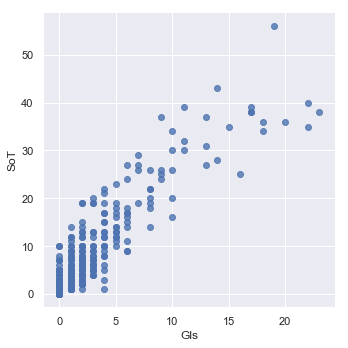

In [347]:
# Look for correlations.  Goals vs. shots of target would make sense! 
sns.set()
sns.lmplot(x='Gls',y='SoT',data=df_trim,fit_reg=False)

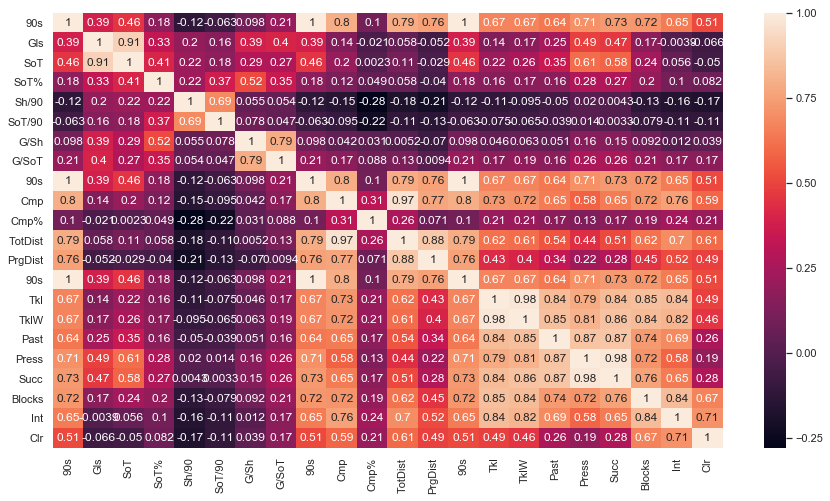

In [348]:
# Heat map of correlations 
plt.figure(figsize=(15,8))
sns.heatmap(df_trim.corr(), annot=True)

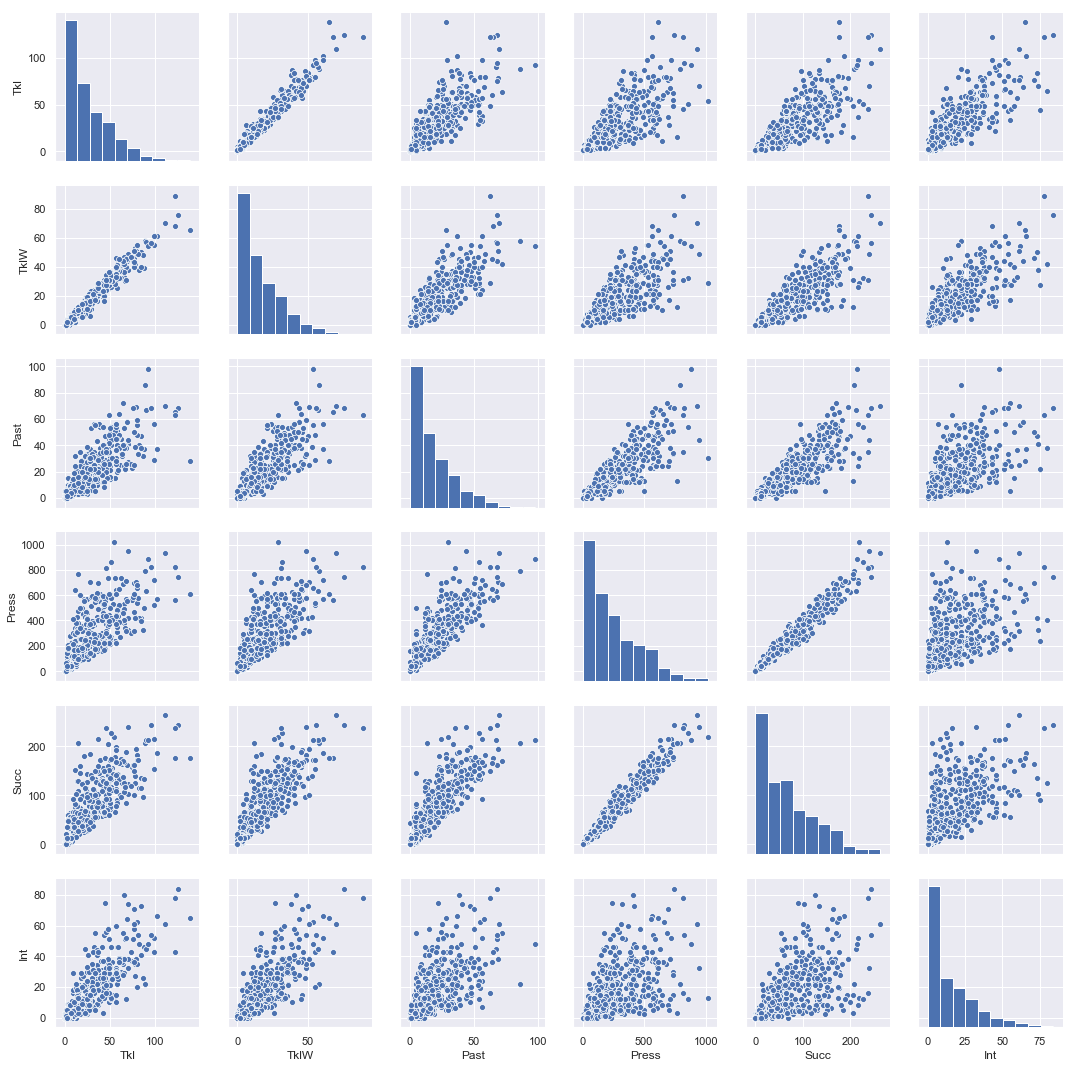

In [349]:
# Pairplots of the defensive features 
sns.pairplot(df_trim[['Tkl','TklW','Past','Press','Succ','Int']])

In [350]:
# START TO BUILD THE CLUSTERING ALGORITHM 
from sklearn.cluster import KMeans

In [351]:
kmeans = KMeans(n_clusters=4)

In [352]:
# FIT THE MODEL
kmeans.fit(df_trim)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [353]:
# Find the cluster centers
# Each feature has a center coordinate 
kmeans.cluster_centers_

array([[1.92815789e+01, 2.69736842e+00, 8.78947368e+00, 2.76690789e+01,
        1.16894737e+00, 3.90789474e-01, 6.63815789e-02, 2.10131579e-01,
        1.92815789e+01, 6.14105263e+02, 7.78039474e+01, 1.12975263e+04,
        3.55486842e+03, 1.92815789e+01, 3.37697368e+01, 2.06710526e+01,
        2.41381579e+01, 3.21230263e+02, 8.88223684e+01, 3.19671053e+01,
        1.86447368e+01, 4.44276316e+01],
       [3.18466667e+01, 2.00000000e+00, 6.13333333e+00, 2.37700000e+01,
        6.93000000e-01, 1.94333333e-01, 7.00000000e-02, 2.58666667e-01,
        3.18466667e+01, 1.79243333e+03, 8.40533333e+01, 3.98012000e+04,
        1.23874333e+04, 3.18466667e+01, 4.68666667e+01, 2.83666667e+01,
        3.08000000e+01, 3.32233333e+02, 1.05533333e+02, 4.27666667e+01,
        3.62000000e+01, 1.09000000e+02],
       [6.60084388e+00, 1.54430380e+00, 4.18143460e+00, 2.21151899e+01,
        1.75135021e+00, 5.95358650e-01, 6.90717300e-02, 1.65358650e-01,
        6.60084388e+00, 1.47400844e+02, 7.29172996e+01

In [354]:
# The output clustering labels 
kmeans.labels_

array([3, 3, 2, 2, 0, 2, 2, 3, 2, 1, 1, 3, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       0, 3, 2, 0, 3, 0, 1, 2, 2, 0, 3, 0, 0, 2, 0, 3, 2, 2, 3, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 3, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 0, 2, 3, 2, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0, 3, 2, 0, 3, 2, 2, 2,
       1, 0, 2, 0, 3, 0, 3, 2, 2, 2, 0, 2, 0, 0, 2, 3, 1, 2, 0, 3, 0, 0,
       3, 1, 0, 2, 3, 3, 2, 2, 2, 2, 3, 2, 0, 0, 1, 3, 3, 2, 0, 0, 0, 1,
       3, 3, 2, 2, 0, 0, 2, 3, 1, 0, 0, 2, 0, 3, 2, 2, 2, 0, 0, 3, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 3, 2, 2, 2, 2, 3, 0, 2, 1, 2, 2, 2, 2, 3, 2,
       2, 0, 3, 3, 0, 1, 2, 0, 0, 0, 0, 0, 3, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       3, 2, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 0, 2,
       2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 3, 0, 2, 0, 2, 2, 3, 3, 3, 1, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 3, 3, 2, 3, 1, 3, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 2, 3, 0,

In [355]:
# check the shape! 
kmeans.labels_.shape

(522,)

In [356]:
# Add to the dataframe 
df['KMeans'] = kmeans.labels_

In [357]:
df.head(10)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,KMeans
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,27.9,3,26,...,37.0,57.0,13.0,1.0,44.0,46,97,67.0,3.0,3
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,36.0,0,14,...,62.0,100.0,30.0,2.0,70.0,35,99,86.0,0.0,3
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,24.6,15,88,...,241.0,23.0,5.0,0.0,18.0,5,19,26.0,0.0,2
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,12.3,4,37,...,125.0,10.0,1.0,0.0,9.0,2,10,10.0,0.0,2
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,9.7,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,2.0,0
5,6,Sergio Agüero\Sergio-Aguero,ar ARG,FW,Manchester City,31.0,1988.0,16.1,16,73,...,135.0,15.0,2.0,0.0,13.0,3,10,3.0,0.0,2
6,7,Albian Ajeti\Albian-Ajeti,ch SUI,MFFW,West Ham,22.0,1997.0,1.5,0,3,...,12.0,0.0,0.0,0.0,0.0,1,2,0.0,0.0,2
7,8,Nathan Aké\Nathan-Ake,nl NED,DF,Bournemouth,24.0,1995.0,27.8,2,24,...,10.0,59.0,30.0,0.0,29.0,33,58,176.0,1.0,3
8,9,Marc Albrighton\Marc-Albrighton,eng ENG,MFDF,Leicester City,29.0,1989.0,9.6,0,10,...,51.0,18.0,1.0,0.0,17.0,8,31,6.0,0.0,2
9,10,Toby Alderweireld\Toby-Alderweireld,be BEL,DF,Tottenham,30.0,1989.0,32.9,2,16,...,10.0,69.0,34.0,1.0,35.0,26,70,229.0,3.0,1


In [358]:
# plot the players by cluster using Principal Component Analysis
# PCA reduces dimensions 
from sklearn.decomposition import PCA

In [359]:
pca_2 = PCA(2)

In [360]:
labels =kmeans.labels_

In [361]:
#Transformed columns
pca_col = pca_2.fit_transform(df_trim)

In [362]:
# Now we have two columns
pca_col[:,0]

array([ 1.13420974e+04,  9.66919024e+03, -7.51144615e+03, -8.78663578e+03,
       -4.08612262e+03, -7.97360002e+03, -1.16270761e+04,  1.10376029e+04,
       -5.12079569e+03,  2.67292073e+04,  4.18576027e+04,  1.32709170e+04,
       -1.24077635e+03, -6.91306360e+02,  5.20248150e+03, -2.42559004e+03,
       -5.16729721e+03,  7.81592432e+02, -1.16946935e+04, -5.48056942e+03,
       -1.16550182e+04, -6.48934711e+03, -4.10351125e+03,  1.45987794e+04,
       -9.13614764e+03, -2.04623765e+03,  1.04928580e+04, -1.95693075e+03,
        3.14558800e+04, -1.04347805e+04, -8.62142672e+03, -3.13337068e+03,
        7.44434771e+03,  7.59380885e+02, -1.34209402e+03, -9.58196561e+03,
       -3.24651286e+03,  9.71692867e+03, -1.16885181e+04, -1.10091835e+04,
        1.26690327e+04, -2.17306013e+03, -7.32124807e+03, -7.91198398e+03,
       -4.93736165e+03, -8.88190501e+03, -9.14909877e+03, -6.42210687e+03,
       -8.60705255e+03, -4.49858001e+03, -6.62827514e+03,  1.09316277e+04,
       -1.02299751e+04,  

No handles with labels found to put in legend.


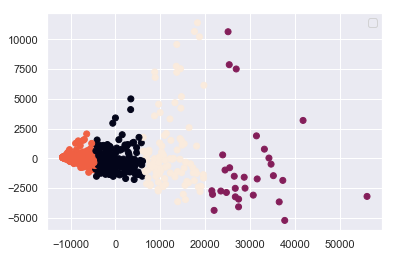

In [363]:
plt.scatter(x=pca_col[:,0], y=pca_col[:,1], c=labels)
plt.legend()

In [453]:
# CHECK OUT THE STATISTICS BASED ON Position
df.groupby(df['Pos']).sum()

,Rk,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,...,Pass,Int,Tkl+Int,Clr,Err,KMeans,KMeans2,KMeans3,mbKM,affProp
Pos,,,,,,,,,,,,,,,,,,,,,
DF,47261,4647.0,358710.0,3083.9,118,1585,445,4083.4,89.74,22.63,...,4114.0,4125,9844,15241.0,161.0,280,212,149,260,3364
DFFW,690,42.0,3995.0,32.2,1,34,12,68.9,2.32,0.84,...,40.0,33,97,40.0,2.0,0,0,1,6,5
DFMF,1939,182.0,13947.0,91.2,5,79,19,138.4,5.75,1.30,...,137.0,144,347,386.0,3.0,6,6,3,15,129
FW,22424,2066.0,165480.0,1236.2,502,3285,1308,2881.8,299.46,111.11,...,1102.0,416,1661,787.0,2.0,132,128,66,71,1315
FWDF,377,23.0,1995.0,0.8,0,0,0,0.0,0.00,0.00,...,2.0,3,9,4.0,0.0,2,2,1,0,19
FWMF,10363,917.0,75788.0,522.4,109,987,338,1156.9,76.15,22.74,...,659.0,323,1076,337.0,5.0,61,55,32,39,619
GK,9067,1087.0,73603.0,759.9,0,3,1,100.0,0.09,0.03,...,8.0,17,18,25.0,44.0,76,52,24,39,591
MF,29505,2852.0,225249.0,1834.5,156,2039,546,2571.1,122.51,35.82,...,2549.0,2356,6412,2768.0,38.0,182,146,104,141,2173
MFDF,4151,420.0,31876.0,197.1,21,212,65,311.2,15.37,3.98,...,294.0,241,657,458.0,6.0,29,23,12,15,289


In [454]:
# CHECK OUT THE STATISTICS BASED ON Position
df.groupby(df['Pos']).mean()

,Rk,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,...,Pass,Int,Tkl+Int,Clr,Err,KMeans,KMeans2,KMeans3,mbKM,affProp
Pos,,,,,,,,,,,,,,,,,,,,,
DF,261.110497,25.674033,1981.823204,17.038122,0.651934,8.756906,2.458564,22.560221,0.495801,0.125028,...,22.729282,22.790055,54.386740,84.204420,0.889503,1.546961,1.171271,0.823204,1.436464,18.585635
DFFW,345.000000,21.000000,1997.500000,16.100000,0.500000,17.000000,6.000000,34.450000,1.160000,0.420000,...,20.000000,16.500000,48.500000,20.000000,1.000000,0.000000,0.000000,0.500000,3.000000,2.500000
DFMF,277.000000,26.000000,1992.428571,13.028571,0.714286,11.285714,2.714286,19.771429,0.821429,0.185714,...,19.571429,20.571429,49.571429,55.142857,0.428571,0.857143,0.857143,0.428571,2.142857,18.428571
FW,266.952381,24.595238,1970.000000,14.716667,5.976190,39.107143,15.571429,34.307143,3.565000,1.322738,...,13.119048,4.952381,19.773810,9.369048,0.023810,1.571429,1.523810,0.785714,0.845238,15.654762
FWDF,377.000000,23.000000,1995.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,9.000000,4.000000,0.000000,2.000000,2.000000,1.000000,0.000000,19.000000
FWMF,272.710526,24.131579,1994.421053,13.747368,2.868421,25.973684,8.894737,30.444737,2.003947,0.598421,...,17.342105,8.500000,28.315789,8.868421,0.131579,1.605263,1.447368,0.842105,1.026316,16.289474
GK,245.054054,29.378378,1989.270270,20.537838,0.000000,0.081081,0.027027,2.702703,0.002432,0.000811,...,0.216216,0.459459,0.486486,0.675676,1.189189,2.054054,1.405405,0.648649,1.054054,15.972973
MF,261.106195,25.238938,1993.353982,16.234513,1.380531,18.044248,4.831858,22.753097,1.084159,0.316991,...,22.557522,20.849558,56.743363,24.495575,0.336283,1.610619,1.292035,0.920354,1.247788,19.230088
MFDF,259.437500,26.250000,1992.250000,12.318750,1.312500,13.250000,4.062500,19.450000,0.960625,0.248750,...,18.375000,15.062500,41.062500,28.625000,0.375000,1.812500,1.437500,0.750000,0.937500,18.062500


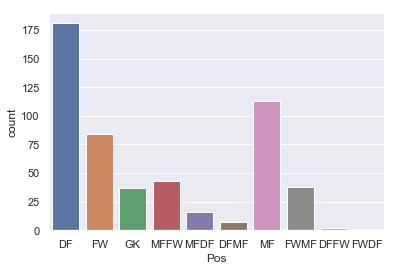

In [365]:
# COUNT PLOT BY POSITION, NOTE A LOT MORE POSITIONS THAN CLUSTERS, COULD MAKE ISSUES 
sns.countplot(x='Pos',data=df)

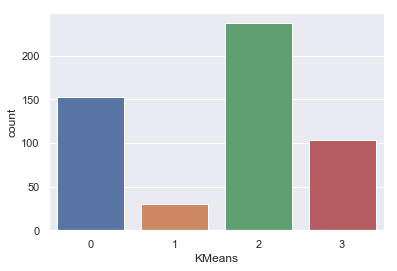

In [366]:
# NOW LOOK AT THE CLUSTERING BY THE KMEANS
#
sns.countplot(x='KMeans',data=df)

In [368]:
# FIRST LOOK AT MIDFIELDERS

df_mid= df[df['Pos']=='MF']

In [369]:
df_mid.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,KMeans
22,23,Stuart Armstrong\Stuart-Armstrong,sco SCO,MF,Southampton,27.0,1992.0,19.1,5,46,...,105.0,24.0,5.0,0.0,19.0,10,59,22.0,1.0,0
34,35,Ross Barkley\Ross-Barkley,eng ENG,MF,Chelsea,25.0,1993.0,12.3,1,40,...,58.0,11.0,3.0,1.0,8.0,8,24,12.0,0.0,0
44,45,Nabil Bentaleb\Nabil-Bentaleb,dz ALG,MF,Newcastle Utd,24.0,1994.0,8.3,0,4,...,10.0,14.0,2.0,0.0,12.0,19,49,12.0,0.0,2
46,47,Jóhann Berg Guðmundsson\Johann-Berg-Gudmundsson,is ISL,MF,Burnley,28.0,1990.0,6.9,1,11,...,36.0,10.0,1.0,0.0,9.0,7,14,8.0,0.0,2
47,48,Sander Berge\Sander-Berge,no NOR,MF,Sheffield Utd,21.0,1998.0,10.5,1,5,...,64.0,28.0,1.0,0.0,27.0,10,36,16.0,0.0,2


In [370]:
df_mid['KMeans'].mean()

1.6106194690265487

In [371]:
df_mid['KMeans'].mode()

0    2
dtype: int32

Text(0.5, 1.0, 'Midfielders')

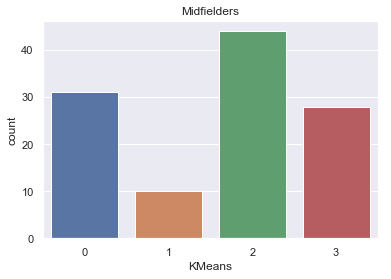

In [372]:
# KMEANS CLUSTERED MIDFIELDERS IN GROUP 2
sns.countplot(x='KMeans',data=df_mid)
plt.title('Midfielders')

Text(0.5, 1.0, 'Defenders')

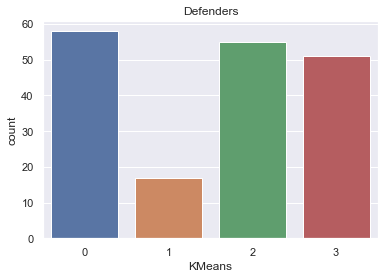

In [373]:
# KMEANS CLUSTERED MIDFIELDERS IN GROUP 0, although group 2 and 3 are heavily represented
sns.countplot(x='KMeans',data=df[df['Pos']=='DF'])
plt.title('Defenders')

In [374]:
df[df['Pos']=='DF']['KMeans'].mode()

0    0
dtype: int32

Text(0.5, 1.0, 'Goal Keepers')

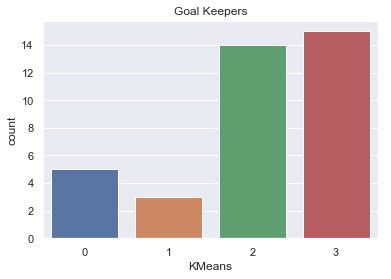

In [375]:
# KMeans clusters GK into group 3
sns.countplot(x='KMeans',data=df[df['Pos']=='GK'])
plt.title('Goal Keepers')

In [376]:
df[df['Pos']=='GK']['KMeans'].mean()

2.054054054054054

In [377]:
df[df['Pos']=='GK']['KMeans'].mode()

0    3
dtype: int32

Text(0.5, 1.0, 'Forwards')

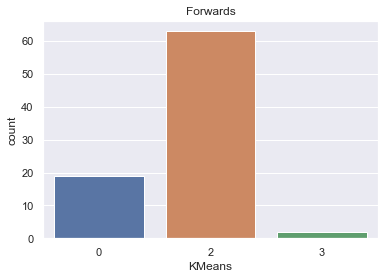

In [378]:
# KMeans clusters Forwards into group 2 
sns.countplot(x='KMeans',data=df[df['Pos']=='FW'])
plt.title('Forwards')

In [379]:
df[df['Pos']=='GK']['KMeans'].mean()

2.054054054054054

In [380]:
df[df['Pos']=='GK']['KMeans'].mode()

0    3
dtype: int32

In [381]:
# GK - 3
# DF - 0
# MF - 2
# FW - 2

# Let's look at some metrics



In [382]:
df_trim[df['Pos']=='GK'].head(10)

,90s,Gls,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,90s,Cmp,...,PrgDist,90s,Tkl,TklW,Past,Press,Succ,Blocks,Int,Clr
4,9.7,0,0,0.0,0.00,0.00,0.0,0.0,9.7,227.0,...,3820.0,9.7,0.0,0,1.0,2.0,0.0,0.0,0,0.0
11,28.3,0,0,0.0,0.00,0.00,0.0,0.0,28.3,794.0,...,12306.0,28.3,0.0,0,3.0,5.0,1.0,0.0,1,2.0
23,33.0,0,0,0.0,0.00,0.00,0.0,0.0,33.0,877.0,...,12292.0,33.0,0.0,0,2.0,3.0,1.0,0.0,1,1.0
61,3.9,0,0,0.0,0.00,0.00,0.0,0.0,3.9,101.0,...,1554.0,3.9,0.0,0,0.0,0.0,0.0,0.0,0,0.0
68,5.0,0,0,0.0,0.00,0.00,0.0,0.0,5.0,121.0,...,2177.0,5.0,0.0,0,0.0,0.0,0.0,0.0,0,1.0
120,38.0,0,0,0.0,0.00,0.00,0.0,0.0,38.0,595.0,...,19289.0,38.0,0.0,0,1.0,9.0,0.0,2.0,1,1.0
125,34.1,0,0,0.0,0.00,0.00,0.0,0.0,34.1,927.0,...,13255.0,34.1,1.0,1,1.0,7.0,2.0,0.0,2,2.0
132,23.5,0,0,0.0,0.00,0.00,0.0,0.0,23.5,378.0,...,13323.0,23.5,0.0,0,3.0,10.0,2.0,0.0,1,2.0
134,0.2,0,0,0.0,0.00,0.00,0.0,0.0,0.2,7.0,...,81.0,0.2,0.0,0,0.0,0.0,0.0,0.0,0,0.0
145,38.0,0,1,100.0,0.03,0.03,0.0,0.0,38.0,535.0,...,20280.0,38.0,0.0,0,3.0,9.0,0.0,1.0,1,1.0


In [383]:
df_trim[df['Pos']=='FW'].head(10)

,90s,Gls,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,90s,Cmp,...,PrgDist,90s,Tkl,TklW,Past,Press,Succ,Blocks,Int,Clr
2,24.6,15,35,39.8,3.58,1.42,0.17,0.43,24.6,288.0,...,813.0,24.6,14.0,10,12.0,429.0,130.0,23.0,5,26.0
3,12.3,4,9,24.3,3.00,0.73,0.11,0.44,12.3,184.0,...,632.0,12.3,8.0,6,5.0,231.0,58.0,10.0,2,10.0
5,16.1,16,25,34.2,4.52,1.55,0.19,0.56,16.1,284.0,...,781.0,16.1,7.0,5,5.0,222.0,56.0,15.0,3,3.0
20,0.2,0,0,0.0,4.50,0.00,0.00,0.00,0.2,7.0,...,14.0,0.2,1.0,0,0.0,2.0,1.0,1.0,0,0.0
21,19.6,10,30,44.8,3.41,1.53,0.13,0.30,19.6,325.0,...,1297.0,19.6,14.0,10,12.0,337.0,78.0,26.0,9,9.0
25,34.8,22,40,44.4,2.58,1.15,0.22,0.50,34.8,612.0,...,2584.0,34.8,39.0,24,38.0,573.0,130.0,59.0,11,16.0
35,15.0,6,11,28.2,2.60,0.73,0.13,0.45,15.0,155.0,...,552.0,15.0,6.0,4,11.0,275.0,63.0,17.0,6,14.0
39,2.7,1,2,13.3,5.65,0.75,0.07,0.50,2.7,61.0,...,85.0,2.7,2.0,1,2.0,72.0,17.0,4.0,0,1.0
45,14.0,2,19,45.2,3.00,1.36,0.05,0.11,14.0,190.0,...,720.0,14.0,9.0,5,7.0,178.0,49.0,14.0,4,25.0
58,10.2,1,7,29.2,2.36,0.69,0.04,0.14,10.2,188.0,...,1215.0,10.2,19.0,13,14.0,174.0,40.0,15.0,13,5.0


In [384]:
df[df['Pos']=='FW']['KMeans'].value_counts()

2    63
0    19
3     2
Name: KMeans, dtype: int64

In [385]:
df[df['Pos']=='MF']['KMeans'].value_counts()

2    44
0    31
3    28
1    10
Name: KMeans, dtype: int64

In [386]:
df[df['Pos']=='DF']['KMeans'].value_counts()

0    58
2    55
3    51
1    17
Name: KMeans, dtype: int64

In [387]:
df[df['Pos']=='GK']['KMeans'].value_counts()

3    15
2    14
0     5
1     3
Name: KMeans, dtype: int64

In [388]:
##### Trim the data set even further.  See if that helps the clustering algorithm 
df_trim.columns

Index(['90s', 'Gls', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', '90s',
       'Cmp', 'Cmp%', 'TotDist', 'PrgDist', '90s', 'Tkl', 'TklW', 'Past',
       'Press', 'Succ', 'Blocks', 'Int', 'Clr'],
      dtype='object')

In [413]:
df_trim2=df_trim[['Gls', 'SoT','Cmp', 'Cmp%',
       'TotDist', 'PrgDist', 'Tkl', 'Past', 'Blocks',
       'Int', 'Clr']]

In [424]:
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(df_trim2)
df['KMeans2'] = kmeans2.labels_

In [415]:
df.head(10)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,KMeans,KMeans2,KMeans3
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,27.9,3,26,...,13.0,1.0,44.0,46,97,67.0,3.0,3,1,2
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,36.0,0,14,...,30.0,2.0,70.0,35,99,86.0,0.0,3,1,2
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,24.6,15,88,...,5.0,0.0,18.0,5,19,26.0,0.0,2,0,1
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,12.3,4,37,...,1.0,0.0,9.0,2,10,10.0,0.0,2,0,1
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,9.7,0,0,...,0.0,0.0,0.0,0,0,0.0,2.0,0,3,1
5,6,Sergio Agüero\Sergio-Aguero,ar ARG,FW,Manchester City,31.0,1988.0,16.1,16,73,...,2.0,0.0,13.0,3,10,3.0,0.0,2,0,1
6,7,Albian Ajeti\Albian-Ajeti,ch SUI,MFFW,West Ham,22.0,1997.0,1.5,0,3,...,0.0,0.0,0.0,1,2,0.0,0.0,2,0,1
7,8,Nathan Aké\Nathan-Ake,nl NED,DF,Bournemouth,24.0,1995.0,27.8,2,24,...,30.0,0.0,29.0,33,58,176.0,1.0,3,1,0
8,9,Marc Albrighton\Marc-Albrighton,eng ENG,MFDF,Leicester City,29.0,1989.0,9.6,0,10,...,1.0,0.0,17.0,8,31,6.0,0.0,2,0,1
9,10,Toby Alderweireld\Toby-Alderweireld,be BEL,DF,Tottenham,30.0,1989.0,32.9,2,16,...,34.0,1.0,35.0,26,70,229.0,3.0,1,2,2


In [416]:
df[df['Pos']=='GK']['KMeans2'].value_counts()

1    15
0    14
3     5
2     3
Name: KMeans2, dtype: int64

In [417]:
df[df['Pos']=='GK']['KMeans'].value_counts(),df[df['Pos']=='GK']['KMeans2'].value_counts()

(3    15
 2    14
 0     5
 1     3
 Name: KMeans, dtype: int64, 1    15
 0    14
 3     5
 2     3
 Name: KMeans2, dtype: int64)

In [418]:
df[df['Pos']=='MF']['KMeans'].value_counts(),df[df['Pos']=='MF']['KMeans2'].value_counts()

(2    44
 0    31
 3    28
 1    10
 Name: KMeans, dtype: int64, 0    44
 3    31
 1    28
 2    10
 Name: KMeans2, dtype: int64)

In [423]:
df[df['Pos']=='DF']['KMeans'].value_counts(),df[df['Pos']=='DF']['KMeans2'].value_counts()

(0    58
 2    55
 3    51
 1    17
 Name: KMeans, dtype: int64, 3    58
 0    55
 1    51
 2    17
 Name: KMeans2, dtype: int64)

In [420]:
df[df['Pos']=='FW']['KMeans'].value_counts(),df[df['Pos']=='FW']['KMeans2'].value_counts()

(2    63
 0    19
 3     2
 Name: KMeans, dtype: int64, 0    63
 3    19
 1     2
 Name: KMeans2, dtype: int64)

In [455]:
# I
(df['KMeans']-df['KMeans2']).sum()

146

In [394]:
# third time the charm? 
df_trim3=df_trim[['Gls', 'SoT','Cmp', 'Cmp%',
       'Tkl', 'Past', 'Blocks',
       'Int', 'Clr']]

In [403]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(df_trim3)
df['KMeans3'] = kmeans3.labels_

In [404]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,KMeans,KMeans2,KMeans3
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28.0,1990.0,27.9,3,26,...,13.0,1.0,44.0,46,97,67.0,3.0,3,3,2
1,2,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19.0,2000.0,36.0,0,14,...,30.0,2.0,70.0,35,99,86.0,0.0,3,3,2
2,3,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21.0,1997.0,24.6,15,88,...,5.0,0.0,18.0,5,19,26.0,0.0,2,2,1
3,4,Che Adams\Che-Adams,eng ENG,FW,Southampton,23.0,1996.0,12.3,4,37,...,1.0,0.0,9.0,2,10,10.0,0.0,2,2,1
4,5,Adrián\Adrian,es ESP,GK,Liverpool,32.0,1987.0,9.7,0,0,...,0.0,0.0,0.0,0,0,0.0,2.0,0,0,1


In [ ]:
# UNFORTUNATELY TRIMMING THE DATA DOES NOT HELP THE MODEL.  WE CAN TRY TO ELIMINATE THE POSITIONS THAT AREN'T GK,DF,MF,FW
# LIKE FWDF, MDFW, ETC SINCE THEY ARE LIMITED IN DATA AND PROBABLY BLEND TWO DISTINCT CLUSTERS

In [399]:
df[df['Pos']=='GK']['KMeans3'].value_counts()

3    15
2    14
0     5
1     3
Name: KMeans3, dtype: int64

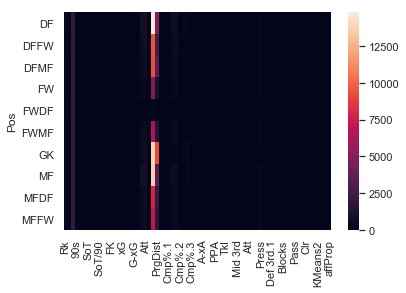

In [450]:
sns.heatmap(df.groupby('Pos').mean())

In [451]:
df.groupby('Pos').count()

,Rk,Player,Nation,Squad,Age,Born,90s,Gls,Sh,SoT,...,Pass,Int,Tkl+Int,Clr,Err,KMeans,KMeans2,KMeans3,mbKM,affProp
Pos,,,,,,,,,,,,,,,,,,,,,
DF,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181
DFFW,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
DFMF,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
FW,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
FWDF,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
FWMF,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
GK,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
MF,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113
MFDF,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


In [501]:
# drop the columns based on position
df_4cat = df[df['Pos'] != 'DFFW']

In [502]:
df_4cat = df_4cat[df_4cat['Pos'] != 'DFMF']

In [503]:
df_4cat = df_4cat[df_4cat['Pos'] != 'DFFW']

In [504]:
df_4cat = df_4cat[df_4cat['Pos'] != 'FWDF']

In [505]:
df_4cat = df_4cat[df_4cat['Pos'] != 'FWMF']

In [506]:
df_4cat = df_4cat[df_4cat['Pos'] != 'MFDF']

In [507]:
df_4cat = df_4cat[df_4cat['Pos'] != 'MFFW']

In [508]:
df_4cat.groupby('Pos').count()

,Rk,Player,Nation,Squad,Age,Born,90s,Gls,Sh,SoT,...,Pass,Int,Tkl+Int,Clr,Err,KMeans,KMeans2,KMeans3,mbKM,affProp
Pos,,,,,,,,,,,,,,,,,,,,,
DF,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181
FW,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
GK,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
MF,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113


In [509]:
df_4cat.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches', 'Cmp',
       'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1',
       'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xA',
       'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'Tkl', 'TklW', 'Def 3rd',
       'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att', 'Tkl%', 'Past', 'Press', 'Succ',
       '%', 'Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1', 'Blocks', 'Sh', 'ShSv',
       'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'KMeans', 'KMeans2', 'KMeans3',
       'mbKM', 'affProp'],
      dtype='object')

In [510]:
# Get the original columns we trimmed to 
df_4cat = df_4cat[[ 'Pos','90s', 'Gls', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', '90s',
       'Cmp', 'Cmp%', 'TotDist', 'PrgDist', '90s', 'Tkl', 'TklW', 'Past',
       'Press', 'Succ', 'Blocks', 'Int', 'Clr']]

In [511]:
df_4cat.head()

,Pos,90s,Gls,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,90s,...,PrgDist,90s,Tkl,TklW,Past,Press,Succ,Blocks,Int,Clr
0,DF,27.9,3,5,19.2,0.93,0.18,0.08,0.40,27.9,...,9268.0,27.9,51.0,32,32.0,267.0,74.0,57.0,46,67.0
1,DF,36.0,0,4,28.6,0.39,0.11,0.00,0.00,36.0,...,6833.0,36.0,64.0,36,24.0,485.0,132.0,100.0,35,86.0
2,FW,24.6,15,35,39.8,3.58,1.42,0.17,0.43,24.6,...,813.0,24.6,14.0,10,12.0,429.0,130.0,23.0,5,26.0
3,FW,12.3,4,9,24.3,3.00,0.73,0.11,0.44,12.3,...,632.0,12.3,8.0,6,5.0,231.0,58.0,10.0,2,10.0
4,GK,9.7,0,0,0.0,0.00,0.00,0.00,0.00,9.7,...,3820.0,9.7,0.0,0,1.0,2.0,0.0,0.0,0,0.0


In [514]:
df_4cat.drop('Pos', axis=1).head()

,90s,Gls,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,90s,Cmp,...,PrgDist,90s,Tkl,TklW,Past,Press,Succ,Blocks,Int,Clr
0,27.9,3,5,19.2,0.93,0.18,0.08,0.40,27.9,1227.0,...,9268.0,27.9,51.0,32,32.0,267.0,74.0,57.0,46,67.0
1,36.0,0,4,28.6,0.39,0.11,0.00,0.00,36.0,1316.0,...,6833.0,36.0,64.0,36,24.0,485.0,132.0,100.0,35,86.0
2,24.6,15,35,39.8,3.58,1.42,0.17,0.43,24.6,288.0,...,813.0,24.6,14.0,10,12.0,429.0,130.0,23.0,5,26.0
3,12.3,4,9,24.3,3.00,0.73,0.11,0.44,12.3,184.0,...,632.0,12.3,8.0,6,5.0,231.0,58.0,10.0,2,10.0
4,9.7,0,0,0.0,0.00,0.00,0.00,0.00,9.7,227.0,...,3820.0,9.7,0.0,0,1.0,2.0,0.0,0.0,0,0.0


In [515]:
kmeans4cat = KMeans(n_clusters=4)
kmeans4cat.fit(df_4cat.drop('Pos', axis=1))
df_4cat['KMeans4cat'] = kmeans4cat.labels_

In [516]:
df_4cat[df_4cat['Pos']=='GK']['KMeans4cat'].value_counts()

0    15
1    14
2     5
3     3
Name: KMeans4cat, dtype: int64

In [517]:
df_4cat[df_4cat['Pos']=='DF']['KMeans4cat'].value_counts()

2    60
1    55
0    49
3    17
Name: KMeans4cat, dtype: int64

In [518]:
df_4cat[df_4cat['Pos']=='MF']['KMeans4cat'].value_counts()

1    44
2    31
0    28
3    10
Name: KMeans4cat, dtype: int64

In [519]:
df_4cat[df_4cat['Pos']=='FW']['KMeans4cat'].value_counts()

1    64
2    18
0     2
Name: KMeans4cat, dtype: int64

In [ ]:
## SOME CHANGE IN VALUES< BUT OVERALL CAN'T SEEM TO CLASSIFY DATA UNIVERSALLY 